<a href="https://colab.research.google.com/github/savindumahasen/Skin-Disease-Classification-Project/blob/main/Skin_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
## install the necessary libraries
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [32]:
## Import the necessary libraries
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [33]:
## download the dataset
od.download("https://www.kaggle.com/datasets/pritpal2873/multiple-skin-disease-detection-and-classification")

Skipping, found downloaded files in "./multiple-skin-disease-detection-and-classification" (use force=True to force download)


In [34]:
## Define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [35]:
import os
import random
import shutil
from math import floor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths
dataset_dir = '/content/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset'
output_dir = '/content/multiple-skin-disease-detection-and-classification/working'

# Allowed image extensions
IMG_EXTENSIONS = ('.png', '.jpg', '.jpeg', '.bmp')

def split_dataset(dataset_dir, output_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    train_dir = os.path.join(output_dir, 'Train')
    val_dir = os.path.join(output_dir, 'Validation')
    test_dir = os.path.join(output_dir, 'Test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        image_files = [
            f for f in os.listdir(class_dir)
            if f.lower().endswith(IMG_EXTENSIONS) and os.path.isfile(os.path.join(class_dir, f))
        ]
        random.shuffle(image_files)

        total_images = len(image_files)
        train_count = floor(total_images * train_ratio)
        val_count = floor(total_images * val_ratio)
        test_count = total_images - train_count - val_count

        train_files = image_files[:train_count]
        val_files = image_files[train_count:train_count + val_count]
        test_files = image_files[train_count + val_count:]

        for file in train_files:
            src = os.path.join(class_dir, file)
            dest = os.path.join(train_dir, class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

        for file in val_files:
            src = os.path.join(class_dir, file)
            dest = os.path.join(val_dir, class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

        for file in test_files:
            src = os.path.join(class_dir, file)
            dest = os.path.join(test_dir, class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

    print("✅ Dataset successfully split into Train, Validation, and Test sets.\n")


# ✅ Step 1: Split dataset
split_dataset(dataset_dir, output_dir)

# ✅ Step 2: Display images from Validation set using matplotlib (Colab compatible)
val_dir = os.path.join(output_dir, 'Validation')
print("📂 Reading images from Validation set...\n")

for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"🧪 Class: {class_name}")
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Filter only image files
        #if os.path.isfile(img_path) and img_name.lower().endswith(IMG_EXTENSIONS):
        #    try:
        #        img = mpimg.imread(img_path)
        #        plt.imshow(img)
        #        plt.title(f"Class: {class_name}")
        #        plt.axis('off')
        #        plt.show()
        #    except Exception as e:
        #        print(f"⚠️ Failed to load image {img_path}: {e}")


✅ Dataset successfully split into Train, Validation, and Test sets.

📂 Reading images from Validation set...

🧪 Class: Melanoma
🧪 Class: Squamous Cell Carcinoma
🧪 Class: Dermatofibroma
🧪 Class: Nevus
🧪 Class: Acitinic Keratosis
🧪 Class: Basal Cell Carcinoma
🧪 Class: Pigmented Benign Keratosis
🧪 Class: Vascular Lesion
🧪 Class: Seborrheic Keratosis


In [36]:
## Load the train set, test set, and validation set
train_dir = "/content/multiple-skin-disease-detection-and-classification/working/Train"
test_dir="/content/multiple-skin-disease-detection-and-classification/working/Test"
validation_dir="/content/multiple-skin-disease-detection-and-classification/working/Validation"

train_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE)
test_set=tf.keras.utils.image_dataset_from_directory(test_dir,
                                                     batch_size=BATCH_SIZE,
                                                     image_size=IMAGE_SIZE)
validation_set=tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMAGE_SIZE)

Found 3930 files belonging to 9 classes.
Found 781 files belonging to 9 classes.
Found 777 files belonging to 9 classes.


In [37]:
## Look at the one batch
for image_size, label_batch in train_set.take(1):
  print(image_size.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


In [38]:
class_names=train_set.class_names
class_names

['Acitinic Keratosis',
 'Basal Cell Carcinoma',
 'Dermatofibroma',
 'Melanoma',
 'Nevus',
 'Pigmented Benign Keratosis',
 'Seborrheic Keratosis',
 'Squamous Cell Carcinoma',
 'Vascular Lesion']

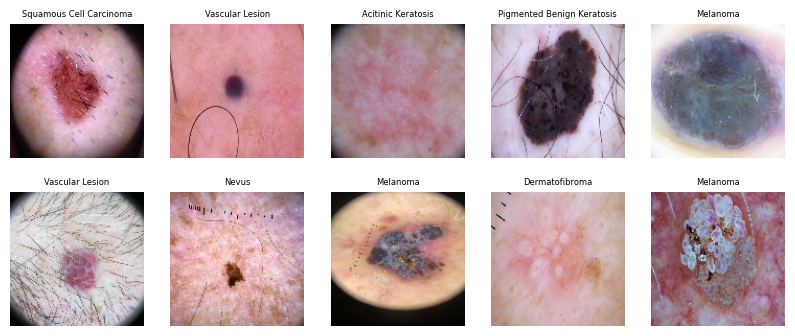

In [39]:
## Plot the training set sample

plt.figure(figsize=(10,4))
for image,label in train_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]], fontsize=6)
    plt.axis('off')

In [40]:
## Look at the images pixal values by taking one batch
for image, label in train_set.take(1):
  print(image)

tf.Tensor(
[[[[ 53.78247   28.78247   23.78247 ]
   [ 54.394287  29.394287  24.394287]
   [ 55.742188  30.742188  25.742188]
   ...
   [ 12.         7.         3.      ]
   [ 14.         9.         5.      ]
   [ 14.         9.         5.      ]]

  [[ 53.929688  28.929688  23.929688]
   [ 54.773438  29.773438  24.773438]
   [ 54.773438  29.773438  24.773438]
   ...
   [ 13.         8.         4.      ]
   [ 14.         9.         5.      ]
   [ 14.         9.         5.      ]]

  [[ 56.        31.        26.      ]
   [ 56.        31.        26.      ]
   [ 55.        30.        25.      ]
   ...
   [ 15.        10.         6.      ]
   [ 15.        10.         6.      ]
   [ 15.        10.         6.      ]]

  ...

  [[159.55469   87.55469   65.55469 ]
   [165.97656   90.97656   69.97656 ]
   [179.21875  104.21875   83.21875 ]
   ...
   [103.35791   52.389893  38.453125]
   [ 75.083496  38.38037   27.42456 ]
   [ 55.732666  27.710938  23.601562]]

  [[151.94946   80.94946   58.9494

In [41]:
## Normalize the  train and test dataset
train_set_new=train_set.map(lambda x,y:(x/255,y))
test_set_new=test_set.map(lambda x,y:(x/255,y))

In [42]:
## Print the normalize data of one batch of train set
for image, label in train_set_new.take(1):
    print(image)

tf.Tensor(
[[[[0.16924019 0.11041667 0.18492647]
   [0.17409524 0.11527172 0.18978152]
   [0.16305818 0.10423464 0.17874445]
   ...
   [0.15129347 0.09639151 0.15521504]
   [0.16078432 0.10588235 0.16470589]
   [0.16078432 0.10588235 0.16470589]]

  [[0.17558211 0.11675858 0.19126838]
   [0.16309455 0.10427102 0.17878082]
   [0.15755688 0.09873334 0.17324315]
   ...
   [0.14579217 0.09089021 0.14971374]
   [0.16078432 0.10588235 0.16470589]
   [0.16078432 0.10588235 0.16470589]]

  [[0.1764706  0.11764706 0.19215687]
   [0.17254902 0.11372549 0.1882353 ]
   [0.15208334 0.0932598  0.16776961]
   ...
   [0.1442402  0.08933824 0.14816177]
   [0.15085784 0.09595589 0.1547794 ]
   [0.15686275 0.10196079 0.16078432]]

  ...

  [[0.07485352 0.03563783 0.07031921]
   [0.08479339 0.0455777  0.08871496]
   [0.09105392 0.04791667 0.10281863]
   ...
   [0.08321078 0.0439951  0.08713235]
   [0.07511202 0.03589633 0.07119045]
   [0.0627451  0.02352941 0.05490196]]

  [[0.06516544 0.02594976 0.060631

In [43]:
## use the pre-train  Xception model
#pretrained_model=tf.keras.applications.Xception(include_top=False,
#                               input_shape=(128,128,3),
#                               weights='imagenet',
#                               pooling='max',
#                                               )
#pretrained_model

#for layer in pretrained_model.layers:
#  layer.trainable=False


pretrained_model=tf.keras.applications.ResNet50(include_top=False,
                                                weights='imagenet',
                                               input_shape=(128,128,3),
                                                pooling='max',

)

In [44]:
## Build the model

model=tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))

model.add(tf.keras.layers.Dense(9,activation='softmax'))


In [45]:
## get the summary of model

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,664,873 (90.27 MB)

 Trainable params: 23,611,753 (90.07 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [46]:
## compile the model


model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [47]:
## train the model
import time
start_time=time.time()
history=model.fit(train_set_new,validation_data=validation_set, epochs=10, batch_size=32)
end_time=time.time()


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 95s 554ms/step - accuracy: 0.2567 - loss: 2.1076 - val_accuracy: 0.1158 - val_loss: 3.1780
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 46s 374ms/step - accuracy: 0.5451 - loss: 1.2680 - val_accuracy: 0.1313 - val_loss: 9.6983
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 45s 365ms/step - accuracy: 0.6971 - loss: 0.8560 - val_accuracy: 0.1158 - val_loss: 42.3414
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 329ms/step - accuracy: 0.8038 - loss: 0.5786 - val_accuracy: 0.1171 - val_loss: 76.9796
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 49s 396ms/step - accuracy: 0.8840 - loss: 0.3478 - val_accuracy: 0.1274 - val_loss: 344.6296
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 46s 377ms/step - accuracy: 0.9163 - loss: 0.2512 - val_accuracy: 0.1223 - val_loss: 1122.0692
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 47s 379ms/step - accuracy: 0.9329 - loss: 0.1943 - val_accuracy: 0.1171 - val_loss: 1265.4032
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 83s 385ms/step - accuracy: 0.9529

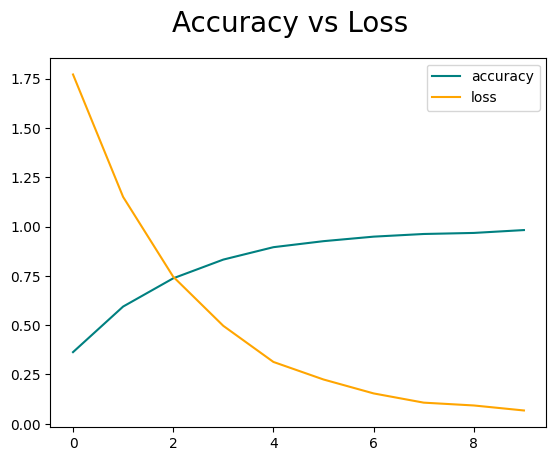

In [48]:

## plot the  accuracy  and loss
fig=plt.figure()
plt.plot(history.history['accuracy'], color='teal',label='accuracy')
plt.plot(history.history['loss'], color='orange', label='loss')
plt.suptitle('Accuracy vs Loss', fontsize=20)
plt.legend()
plt.show()

In [49]:
## Test set

In [66]:
class_test_names=test_set.class_names
class_test_names

['Acitinic Keratosis',
 'Basal Cell Carcinoma',
 'Dermatofibroma',
 'Melanoma',
 'Nevus',
 'Pigmented Benign Keratosis',
 'Seborrheic Keratosis',
 'Squamous Cell Carcinoma',
 'Vascular Lesion']

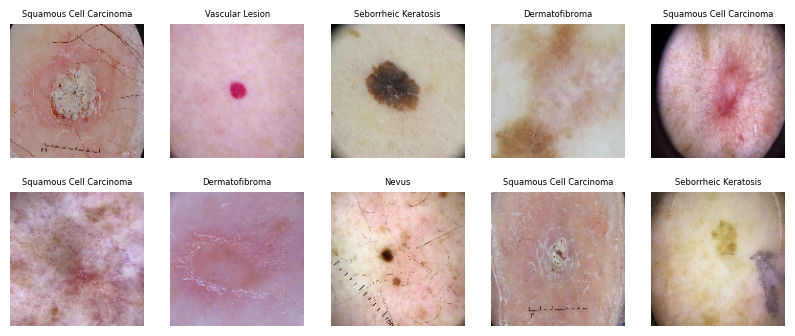

In [67]:
## Plot the testing set sample

plt.figure(figsize=(10,4))
for image,label in test_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_test_names[label[i]], fontsize=6)
    plt.axis('off')

In [68]:
## Get the test data image and its label shape
def test_image():
  for image,label in test_set_new:
    return image
test_image=test_image()
print(test_image.shape)


def test_image_label():
  for image,label in test_set_new:
    return label
test_label=test_image_label()
print(test_label.shape)

(32, 128, 128, 3)
(32,)


In [69]:
## import the model peformance metrices

precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

In [70]:
## make the predictions using  one test data batch
model_predictions_new=model.predict(test_image)
model_predictions_new.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


(32, 9)

In [71]:

## evaluvate the model performance using performance metrices

for batch in test_set_new.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)  # (32, 9)
    yhat_classes = np.argmax(yhat, axis=1)  # (32,)

    precision.update_state(y, yhat_classes)
    recall.update_state(y,yhat_classes)
    accuracy.update_state(y,yhat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [72]:
precision.result(), recall.result(), accuracy.result()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.9837996959686279>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9751824736595154>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.8527528643608093>)

In [73]:
## Make the predictions based on the test data
predictions = model.predict(X)
predictions[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([3.3495973e-05, 1.0993784e-04, 9.7399354e-01, 8.4582271e-06,
       3.4865627e-07, 4.6596135e-05, 2.3299037e-05, 2.3181420e-02,
       2.6029211e-03], dtype=float32)

In [74]:
class_names

['Acitinic Keratosis',
 'Basal Cell Carcinoma',
 'Dermatofibroma',
 'Melanoma',
 'Nevus',
 'Pigmented Benign Keratosis',
 'Seborrheic Keratosis',
 'Squamous Cell Carcinoma',
 'Vascular Lesion']

In [75]:

## get the predicted class  index
import numpy  as np
predicted_index=np.argmax(predictions[1])
predicted_index

np.int64(2)

In [76]:

class_name=['Actinic Keratosis','Basal Cell Carcinoma','Dermatofibroma', 'Melanoma','Nevus','Pigmented Benign Keratosis','Seborrheic Keratosis','Squamous Cell Carcinoma','Vascular Lesion']
predicted_class=class_name[predicted_index]
print("Brain Tumor : ",predicted_class)

Brain Tumor :  Dermatofibroma


In [60]:
## use the model based on the user data

In [61]:
!pip install opencv-python

In [62]:
import cv2

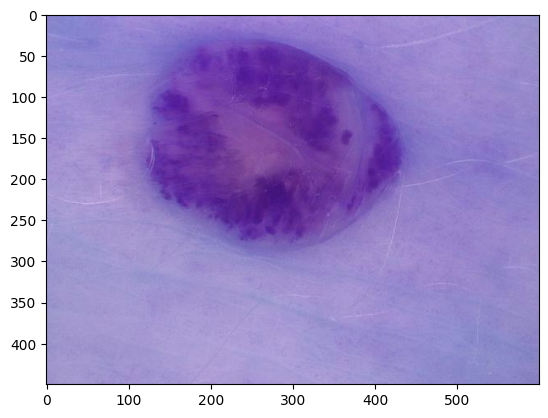

In [108]:

image=cv2.imread("/content/multiple-skin-disease-detection-and-classification/working/Test/Vascular Lesion/ISIC_0024370.jpg")
plt.imshow(image)
plt.show()

In [109]:
## scaled the data

resized_image=tf.image.resize(image,IMAGE_SIZE)
scaled_image=resized_image/255

In [110]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.5426212 , 0.5151702 , 0.8014447 ],
        [0.5421856 , 0.52649933, 0.80885226],
        [0.53333336, 0.52156866, 0.8039216 ],
        ...,
        [0.60164773, 0.57419676, 0.8134124 ],
        [0.5816483 , 0.5675551 , 0.8049326 ],
        [0.5741728 , 0.56632966, 0.80162376]],

       [[0.531834  , 0.504383  , 0.7906576 ],
        [0.5330882 , 0.51740193, 0.7997549 ],
        [0.5287483 , 0.51698357, 0.7993365 ],
        ...,
        [0.6008885 , 0.5734375 , 0.8126532 ],
        [0.58503085, 0.5709377 , 0.80831516],
        [0.577833  , 0.56998986, 0.80528396]],

       [[0.5416121 , 0.5141611 , 0.8004356 ],
        [0.54125786, 0.5255716 , 0.8079245 ],
        [0.53805435, 0.52628964, 0.80864257],
        ...,
        [0.59528184, 0.56783086, 0.8070466 ],
        [0.59409755, 0.5744897 , 0.8137054 ],
        [0.59476775, 0.5751599 , 0.8143756 ]],

       ...,

       [[0.6156863 , 0.57254905, 0.7921569 ],
        [0.62

In [111]:
## Expand the dimension of image

user_image=np.expand_dims(scaled_image,0).shape
user_image

(1, 128, 128, 3)

In [112]:
model_predictions_new=model.predict(np.expand_dims(scaled_image,0))
model_predictions_new.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


(1, 9)

In [113]:
model_predictions_new

array([[2.2544690e-08, 1.3174245e-07, 8.3560752e-07, 1.6514509e-08,
        1.4302424e-08, 1.0377377e-08, 1.4270427e-09, 1.3033837e-08,
        9.9999893e-01]], dtype=float32)

In [114]:
import numpy  as np
predicted_index=np.argmax(model_predictions_new)
predicted_index

np.int64(8)

In [115]:
class_name=['Actinic Keratosis','Basal Cell Carcinoma','Dermatofibroma', 'Melanoma','Nevus','Pigmented Benign Keratosis','Seborrheic Keratosis','Squamous Cell Carcinoma','Vascular Lesion']
predicted_class=class_name[predicted_index]
print("Brain Tumor : ",predicted_class)

Brain Tumor :  Vascular Lesion
